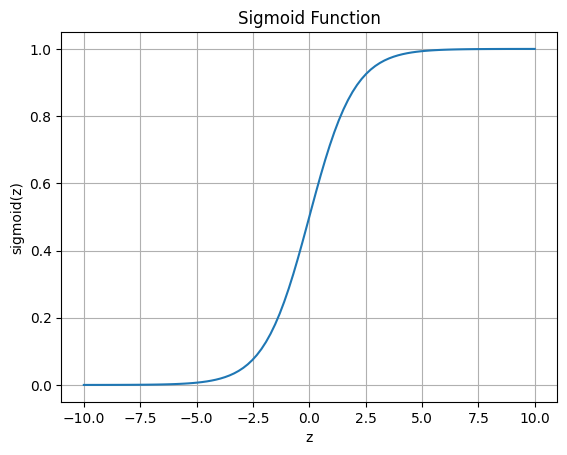

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values from -10 to 10
z = np.linspace(-10, 10, 100)
# Compute the sigmoid function for each value
sig = sigmoid(z)

# Plot the sigmoid function
plt.plot(z, sig)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import streamlit as st


In [2]:
df = pd.read_csv('./datasets/spam.csv')


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

# COST FUNCTION

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute log loss (binary cross-entropy)
cost = log_loss(y_test, y_prob)
print(f"Log Loss (Binary Cross-Entropy): {cost:.2f}")



Log Loss (Binary Cross-Entropy): 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# OPTIMIZER

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model with SGD
# Ensure the loss parameter is set to 'log' for logistic regression
sgd_model = SGDClassifier(loss='log', max_iter=1000, learning_rate='constant', eta0=0.01)

# Fit the model
try:
    sgd_model.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred: {e}")


# Predict
try:
  y_pred = sgd_model.predict(X_test)
except Exception as e:
    print(f"An error occurred: {e}")

# Evaluate
try:
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with SGD: {accuracy:.2f}")
except Exception as e:
    print(f"An error occurred: {e}")
print(f"Accuracy with SGD: {accuracy:.2f}")



An error occurred: The 'loss' parameter of SGDClassifier must be a str among {'hinge', 'modified_huber', 'squared_hinge', 'squared_error', 'log_loss', 'huber', 'squared_epsilon_insensitive', 'perceptron', 'epsilon_insensitive'}. Got 'log' instead.
An error occurred: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
An error occurred: Found input variables with inconsistent numbers of samples: [171, 4]
Accuracy with SGD: 0.80


# 1. Evaluation Metrics for Classification Models

In [2]:
# ACCURACY
from sklearn.metrics import accuracy_score

# Example
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 0]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


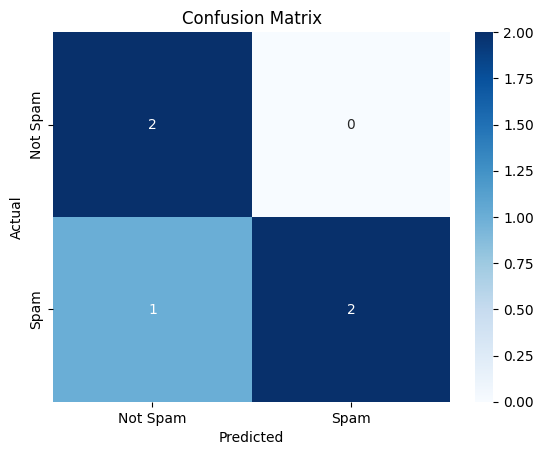

In [3]:
# CONFUSION MATRICS

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [4]:
# Precision, Recall and F1 Score

from sklearn.metrics import precision_score, recall_score, f1_score

# Example
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 0.67
F1 Score: 0.80


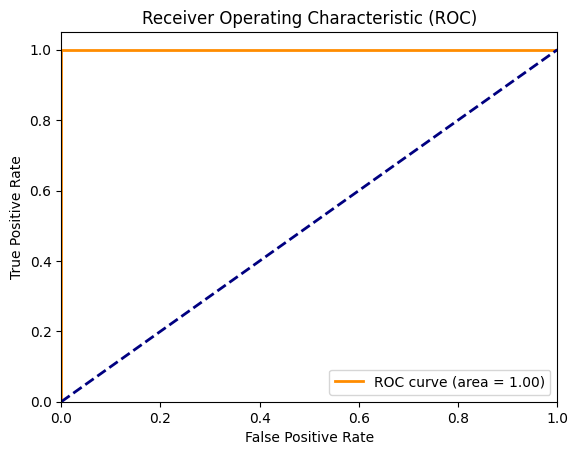

In [5]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Example
y_prob = [0.9, 0.1, 0.8, 0.6, 0.2]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# 2. Evaluation Metrics for Regression Models

In [6]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

# Example
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.1, 7.8]

mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.47


In [7]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Example
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.29


In [8]:
# Root Mean Squared Error (RMSE)
import numpy as np

# Example
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 0.54


In [9]:
# R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score

# Example
r2 = r2_score(y_true, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 0.96


In [5]:
import pandas as pd
df = pd.read_csv('./datasets/spam.csv')

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Preprocess the data (assuming the columns are 'Category' and 'Message')
df['label'] = df['Category'].map({'spam': 1, 'ham': 0})  # Convert labels to binary (spam=1, ham=0)

# Features and target
X = df['Message']
y = df['label']

In [10]:
df['category'] = df['category'].map({'spam': 1, 'ham': 0})  # Convert labels to binary (spam=1, ham=0)

KeyError: 'category'